# Лабораторная работа № 1 по предмету "Методы оптимизации"
<p style='text-align: right'> Выполнил Горелик Александр, МП-301 </p>

**Цель работы(вариант 16)**: Найти точку минимума целевой функции $f (x) = e^{x^2 + x} + e^{x^2 + 1}$ на отрезке $[-1, 1]$ с точностью  $\epsilon = 0.01$ с помощью метода дихотомии и метода деления отрезка пополам.

Для визуализации лабораторной работы начертим график данной функции на отрезке.

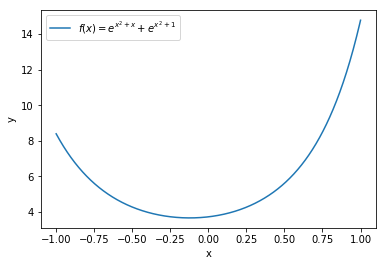

In [15]:
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return np.exp(x * x + x) + np.exp(x * x + 1)

x = np.linspace(-1, 1, 1000)
y = f(x)
plt.plot(x, y, label='$f (x) = e^{x^2 + x} + e^{x^2 + 1}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

1. Найдем минимум методом дихотомии. Затем воспользуемся функцией *scipy.optimize.minimize_scalar* для проверки полученного результата и продемонстрируем на графике.

Result of dychotomy method:  -0.12097265624999999
Result of library minimize function:  -0.12275070459589121
Absolute error 0.0017780483458912227
Relative error -0.014485035762073651


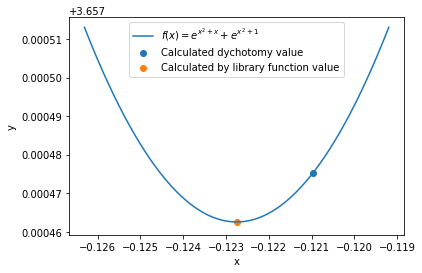

In [16]:
epsilon = 1e-2
alpha = 1e-3
a = -1
b = 1
ak = a
bk = b
k = 1
while (bk - ak > epsilon):
    xk = (ak + bk)/2 - alpha
    yk = (ak + bk)/2 + alpha
    k += 1
    if f(xk) >= f(yk):
        ak = xk
    else:
        bk = yk
    #print(ak, bk)
x_min = (ak + bk)/2
print('Result of dychotomy method: ', x_min)
x_min_lib = spo.minimize_scalar(f).x
print('Result of library minimize function: ', x_min_lib)
abs_error = np.abs(x_min - x_min_lib)
print('Absolute error', abs_error)
print('Relative error', abs_error / x_min_lib)

local_x = np.linspace(x_min_lib - 2 * abs_error, x_min_lib + 2 * abs_error, 1000)
local_y = f(local_x)
plt.plot(local_x, local_y, label='$f (x) = e^{x^2 + x} + e^{x^2 + 1}$')
plt.scatter(x_min, f(x_min), label='Calculated dychotomy value')
plt.scatter(x_min_lib, f(x_min_lib), label='Calculated by library function value')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

 П. 2. Воспользуемся методом деления отрезка пополам.

-0.5 0.5
-0.25 0.25
-0.25 0.0
-0.1875 -0.0625
-0.15625 -0.09375
-0.140625 -0.109375
-0.1328125 -0.1171875
-0.125 -0.1171875
Result of partition method:  -0.12109375
Result of library minimize function:  -0.12275070459589121
Absolute error 0.0016569545958912135
Relative error -0.013498534296369945


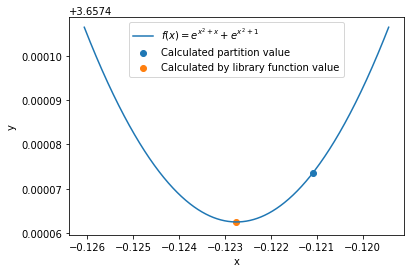

In [21]:
epsilon = 1e-2
a = -1
b = 1
ak = a
bk = b
ck = (ak + bk)/2
k = 1
while (bk - ak > epsilon):
    xk = ak + (bk - ak)/4
    yk = bk - (bk - ak)/4
    k += 1
    if f(xk) < f(ck):
        bk = ck
        ck = xk
    elif f(yk) < f(ck):
        ak = ck
        ck = yk
    else:
        ak = xk
        bk = yk
    print(ak, bk)
x_min = ck
print('Result of partition method: ', x_min)
x_min_lib = spo.minimize_scalar(f).x
print('Result of library minimize function: ', x_min_lib)
abs_error = np.abs(x_min - x_min_lib)
print('Absolute error', abs_error)
print('Relative error', abs_error / x_min_lib)

local_x = np.linspace(x_min_lib - 2 * abs_error, x_min_lib + 2 * abs_error, 1000)
local_y = f(local_x)
plt.plot(local_x, local_y, label='$f (x) = e^{x^2 + x} + e^{x^2 + 1}$')
plt.scatter(x_min, f(x_min), label='Calculated partition value')
plt.scatter(x_min_lib, f(x_min_lib), label='Calculated by library function value')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Таким образом, с помощью обоих методов мы получили результаты с достаточно низкой абсолютной и относительной погрешностью.